<a href="https://colab.research.google.com/github/Tharun895/gui/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/ddos_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)
print("Dataset Shape: ", df.shape)
print("First 5 rows: \n", df.head())

Dataset Shape:  (104345, 23)
First 5 rows: 
       dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes 

Preprocessing the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
# Check for non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['src', 'dst', 'Protocol'], dtype='object')


In [ ]:
X_train = X_train.drop(non_numeric_columns, axis=1)
X_test = X_test.drop(non_numeric_columns, axis=1)

In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps'],
      dtype='object')
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps'],
      dtype='object')


In [ ]:
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index([], dtype='object')


In [ ]:
# Clean up column names by removing leading/trailing spaces and converting to lowercase
X_train.columns = X_train.columns.str.strip().str.lower()
X_test.columns = X_test.columns.str.strip().str.lower()

# Then, retry encoding
for column in non_numeric_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

In [ ]:
print(f"Missing values in training data: {X_train.isna().sum().sum()}")
print(f"Missing values in testing data: {X_test.isna().sum().sum()}")
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
print("Missing values handled.")

Missing values in training data: 798
Missing values in testing data: 214
Missing values handled.


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (83476, 19)
Test set shape: (20869, 19)


Visualizing Data Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

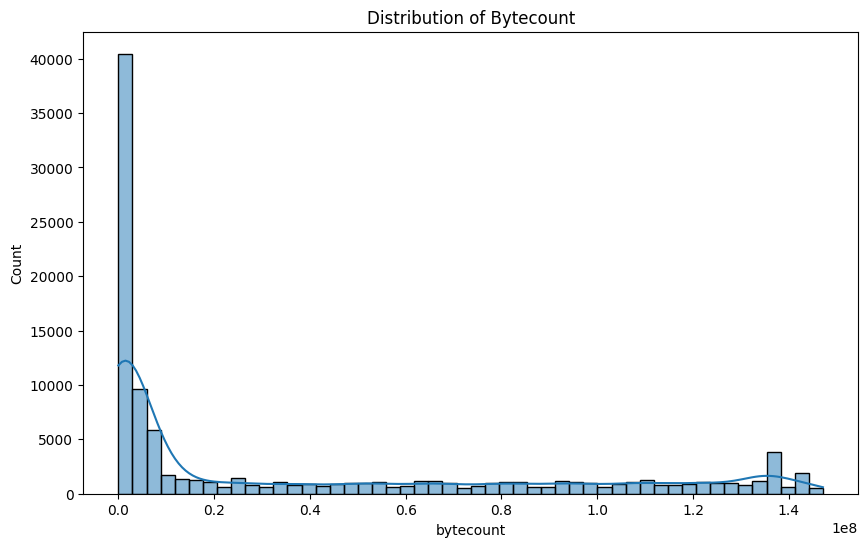

In [ ]:
# Plot the distribution of a feature (replace 'bytecount' with any relevant feature)
plt.figure(figsize=(10, 6))
sns.histplot(df['bytecount'], bins=50, kde=True)
plt.title('Distribution of Bytecount')
plt.show()

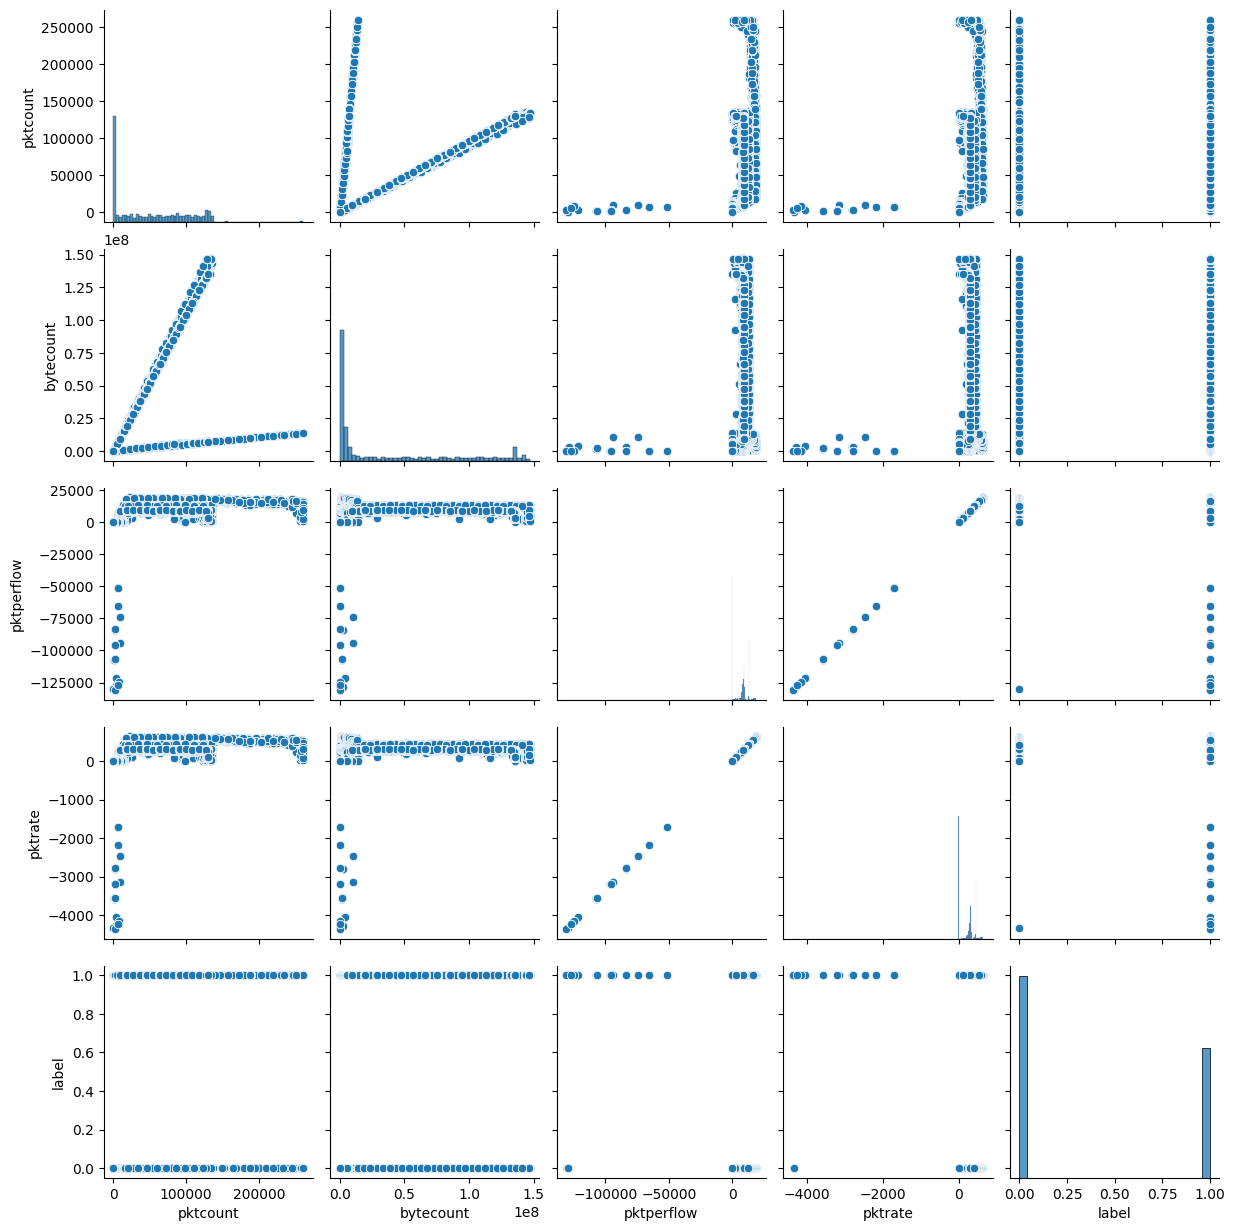

In [ ]:
# Plot pairwise relationships
sns.pairplot(df[['pktcount', 'bytecount', 'pktperflow', 'pktrate', 'label']])
plt.show()

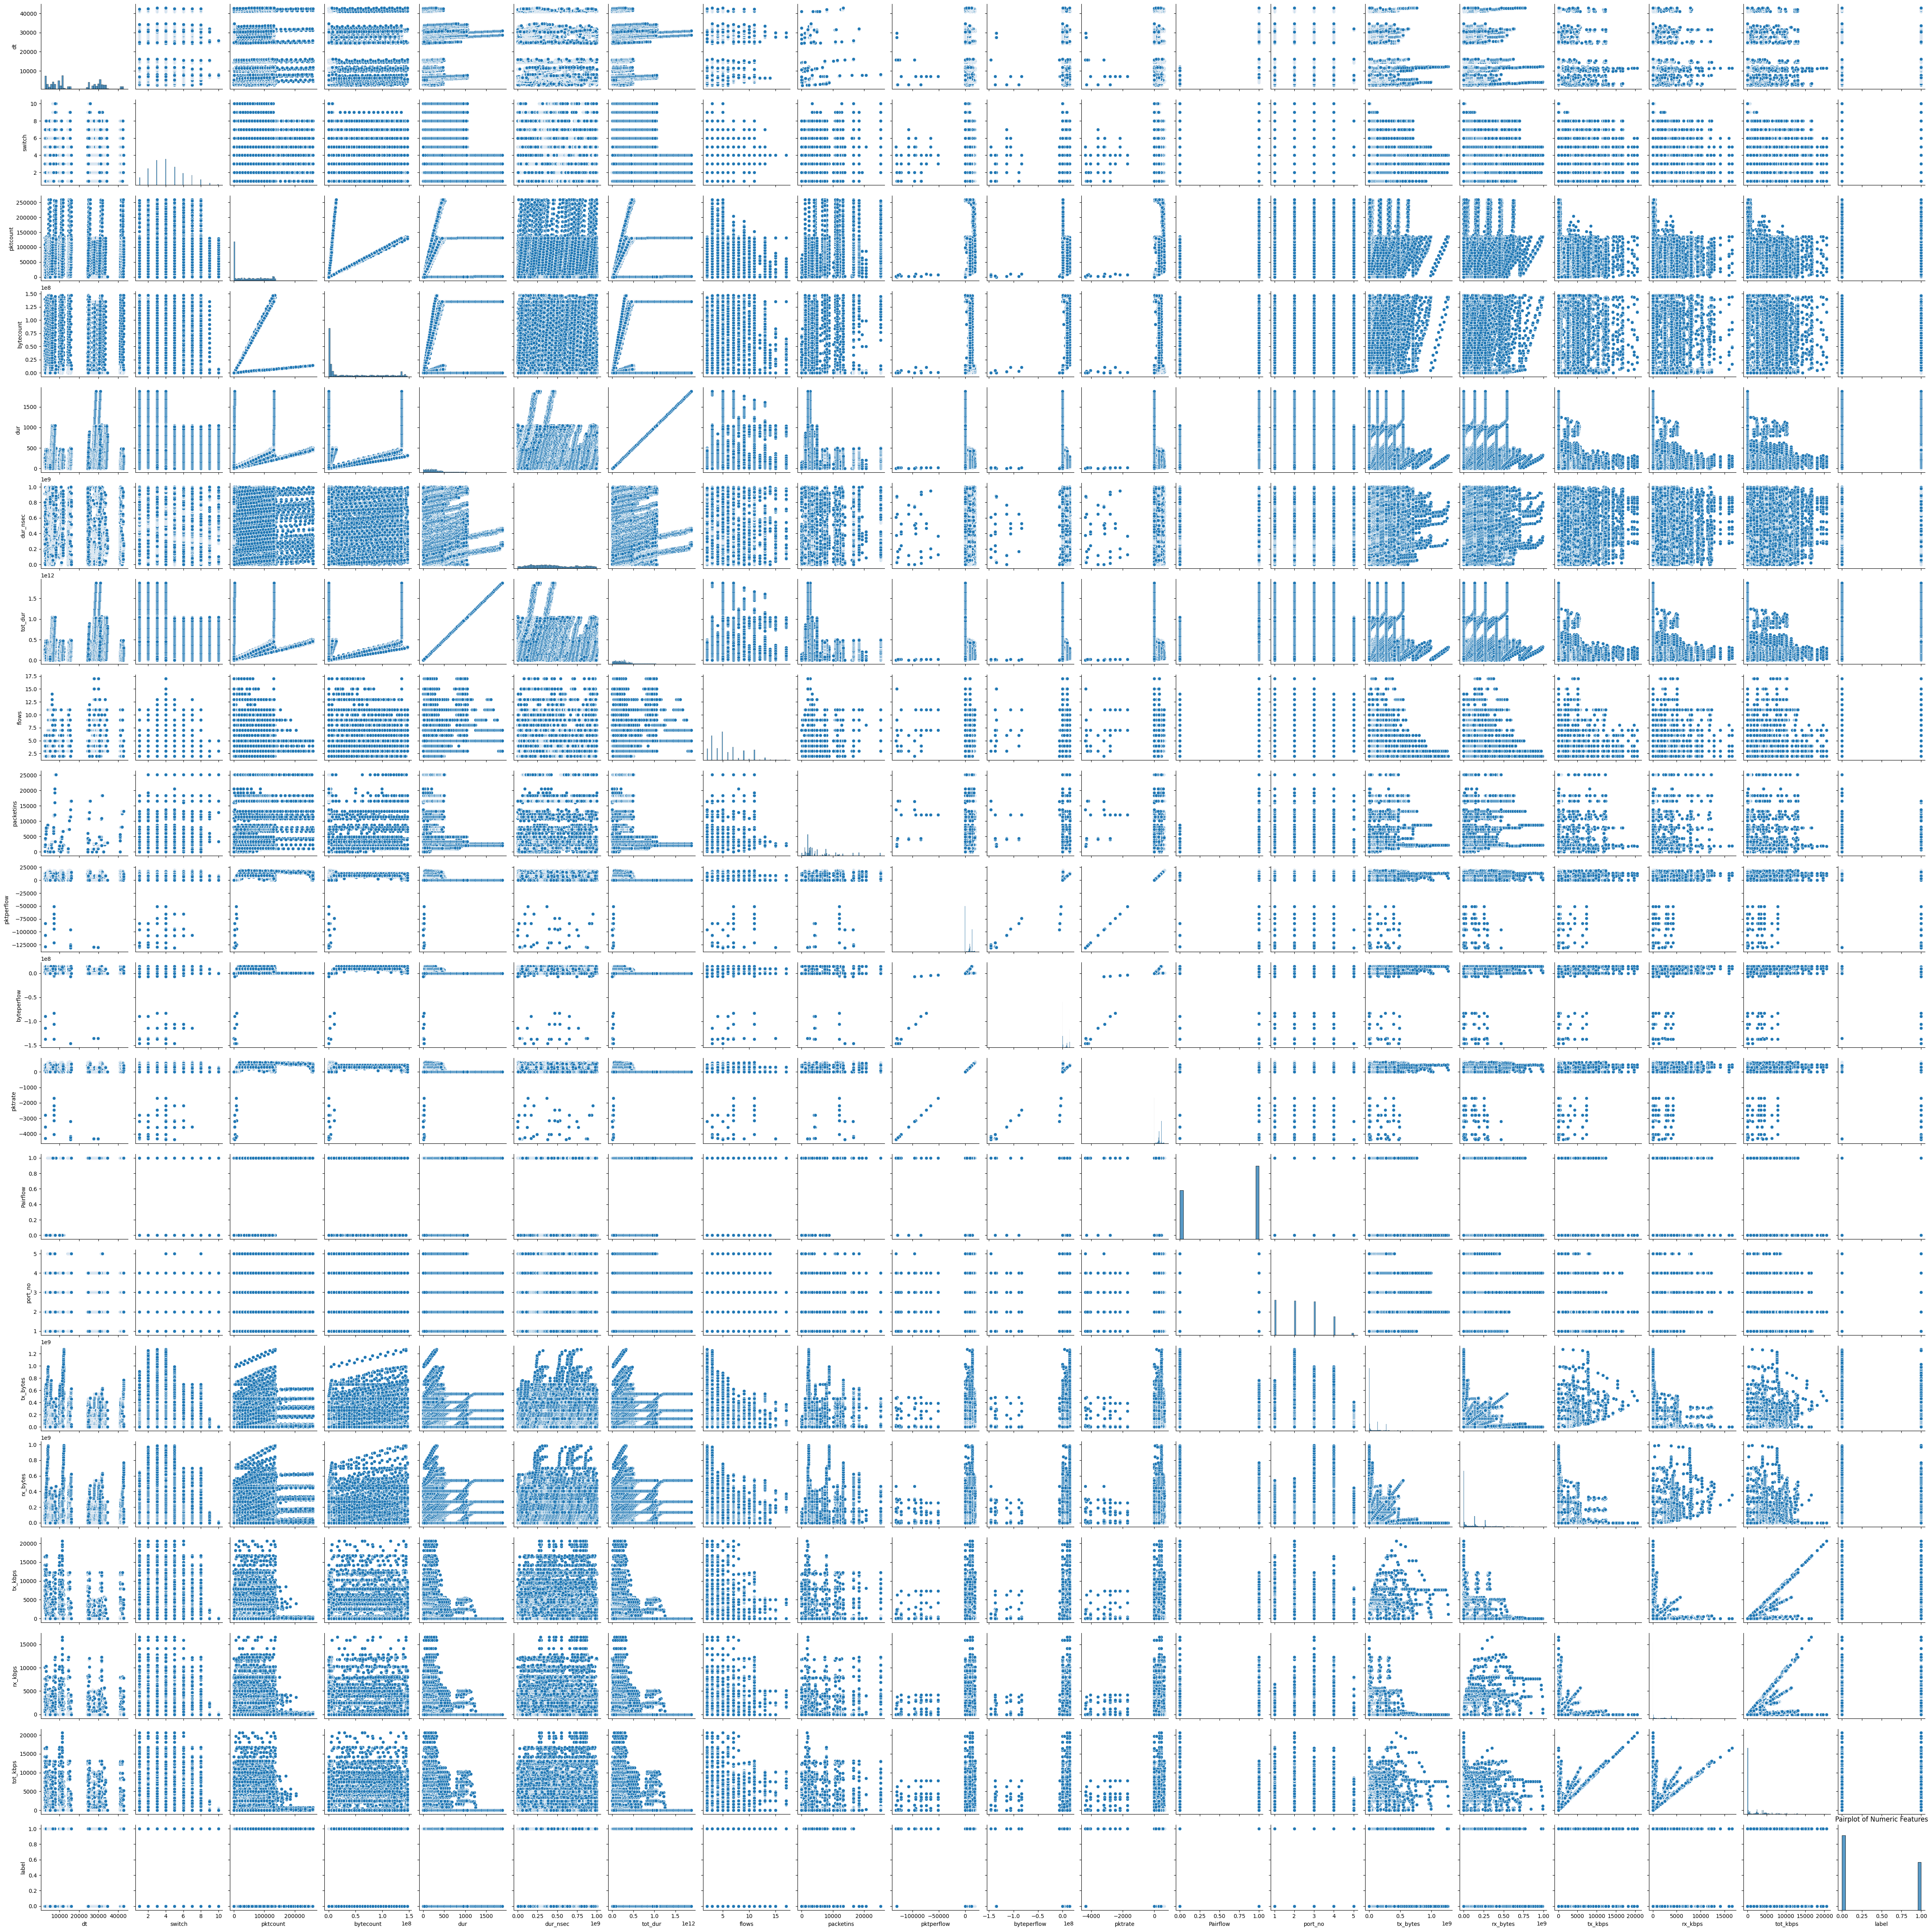

In [ ]:
  # Pairplot of numeric features
  sns.pairplot(df_numeric)
  plt.title('Pairplot of Numeric Features')
  plt.show()


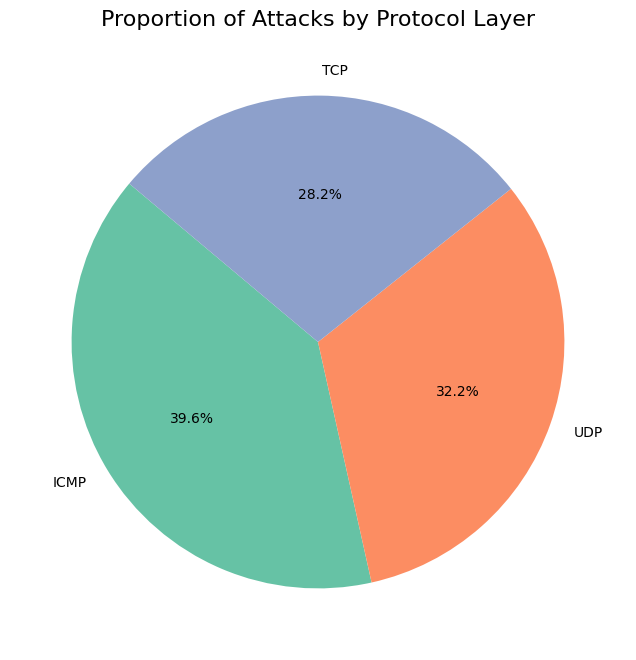

In [ ]:
# Proceed only if 'protocol' exists
protocol_attack_counts = df[df['label'] != 'benign']['protocol'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(protocol_attack_counts.values,
        labels=protocol_attack_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2'))

plt.title('Proportion of Attacks by Protocol Layer', fontsize=16)
plt.show()


Feature Extraction using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
print(f"Original features: {X_train_scaled.shape[1]}")
print(f"PCA-reduced features: {X_train_pca.shape[1]}")
print("PCA feature extraction completed.")

Original features: 19
PCA-reduced features: 13
PCA feature extraction completed.


In [ ]:
# Display PCA-extracted features
print("\nExtracted PCA Features and Explained Variance Ratios:")
for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    feature_contributions = {X_train.columns[j]: abs(component[j]) for j in range(len(component))}
    sorted_features = sorted(feature_contributions.items(), key=lambda x: x[1], reverse=True)[0:]
    print(f"PCA Component {i+1} (Explained Variance: {variance:.4f}): {sorted_features}")


Extracted PCA Features and Explained Variance Ratios:
PCA Component 1 (Explained Variance: 0.2230): [('pktrate', np.float64(0.41179365605069584)), ('pktperflow', np.float64(0.4117341017797456)), ('byteperflow', np.float64(0.4049254943810063)), ('bytecount', np.float64(0.27486253828433527)), ('dt', np.float64(0.2680067672259214)), ('dur', np.float64(0.2657544580770032)), ('tot_dur', np.float64(0.26570664927612975)), ('pairflow', np.float64(0.25246280593268217)), ('pktcount', np.float64(0.2507157158202184)), ('flows', np.float64(0.20107230660880485)), ('tot_kbps', np.float64(0.11958656290092637)), ('rx_kbps', np.float64(0.08888913860840111)), ('tx_kbps', np.float64(0.0786581842336025)), ('rx_bytes', np.float64(0.05940856937864986)), ('dur_nsec', np.float64(0.05897429730477835)), ('tx_bytes', np.float64(0.05126694837496862)), ('switch', np.float64(0.04401380763019758)), ('packetins', np.float64(0.03617045188875553)), ('port_no', np.float64(0.00611979693955345))]
PCA Component 2 (Explaine

**Feature Selection Using PSO (Particle Swarm Optimization)**


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=0e9f0f636b3ccda5243a818f2a3fdbba7608e858a4bd8d34ac1297e29baf2e5d
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
from pyswarm import pso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
convergence = []

def objective_function(features):
    selected_features = [i for i in range(len(features)) if features[i] > 0.5]

    # Ensure at least one feature is selected
    if not selected_features:
        return 1  # Penalize empty selections

    # Fix potential IndexError
    selected_features = [i for i in selected_features if i < X_train_pca.shape[1]]

    if not selected_features:  # If all selected indices were invalid
        return 1

    X_train_selected = X_train_pca[:, selected_features]
    model = RandomForestClassifier(n_estimators=50, random_state=42)

    scores = cross_val_score(model, X_train_selected, y_train, cv=3, scoring='accuracy')
    convergence.append(-scores.mean())
    return -scores.mean()


In [ ]:
num_features_pca = X_train_pca.shape[1]
lower_bounds = [0] * num_features_pca
upper_bounds = [1] * num_features_pca
print("Starting PSO for feature selection...")

Starting PSO for feature selection...


In [ ]:
# Run PSO
best_features_pca, best_score_pca = pso(
    objective_function,
    lower_bounds,
    upper_bounds,
    swarmsize=15,
    maxiter=5
)

Stopping search: Swarm best objective change less than 1e-08


In [ ]:
# Select final features
selected_features_pca = [i for i in range(len(best_features_pca)) if best_features_pca[i] > 0.5]
X_train_final = X_train_pca[:, selected_features_pca]
X_test_final = X_test_pca[:, selected_features_pca]
print(f"No of Selected features after PCA + PSO: {len(selected_features_pca)}")
print(f" Selected features after PCA + PSO: {selected_features_pca}")

No of Selected features after PCA + PSO: 9
 Selected features after PCA + PSO: [0, 1, 2, 3, 5, 6, 7, 8, 10]


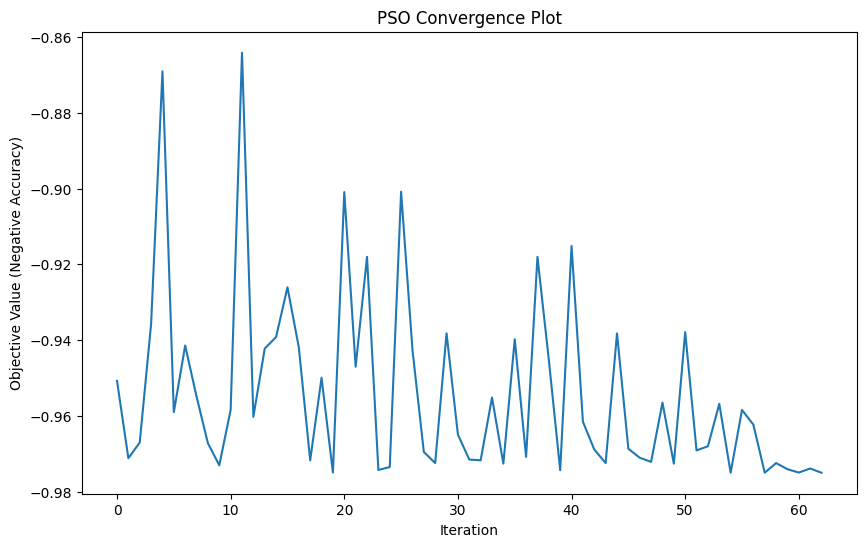

In [ ]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(convergence)
plt.title('PSO Convergence Plot')
plt.xlabel('Iteration')
plt.ylabel('Objective Value (Negative Accuracy)')
plt.show()

Hyperparameter Tuning using Bayesian Optimization

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the search space for hyperparameters
param_space = {
    'n_estimators': (10, 200),
    'max_depth': (3, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

In [ ]:
# Setting up Bayesian search with RandomForest
bayes_search = BayesSearchCV(
    RandomForestClassifier(),
    param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Train the model using the selected features from PSO
bayes_search.fit(X_train_final, y_train)

# Best hyperparameters found by Bayesian Optimization
print("Best Hyperparameters:", bayes_search.best_params_)

Best Hyperparameters: OrderedDict([('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 143)])


Model Training and Evaluation

In [ ]:
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test_final)
print("Model evaluation in progress...")

Model evaluation in progress...


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.86%


In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     12722
           1       0.97      0.98      0.97      8147

    accuracy                           0.98     20869
   macro avg       0.98      0.98      0.98     20869
weighted avg       0.98      0.98      0.98     20869



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[12442   280]
 [  166  7981]]


In [ ]:
# Assuming y_test is the true labels and y_pred is the predicted labels from your model
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate the False Positive Rate (FPR) and False Negative Rate (FNR)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

In [ ]:
print(f"False Positive Rate (FPR): {FPR}")
print(f"False Negative Rate (FNR): {FNR}")

False Positive Rate (FPR): 0.02200911806319761
False Negative Rate (FNR): 0.020375598379771695


In [ ]:
# Convert predictions into a DataFrame
df_results = pd.DataFrame({'Actual_Label': y_test, 'Predicted_Label': y_pred})

    # Count occurrences of DDoS (1) and Normal (0) traffic
total_samples = len(df_results)
ddos_attacks = (df_results['Predicted_Label'] == 1).sum()
normal_traffic = (df_results['Predicted_Label'] == 0).sum()

print(f"🔍 Total Test Samples: {total_samples}")
print(f"🚨 DDoS Attack Samples: {ddos_attacks} ({(ddos_attacks/total_samples)*100:.2f}%)")
print(f"✅ Normal Traffic Samples: {normal_traffic} ({(normal_traffic/total_samples)*100:.2f}%)\n")

🔍 Total Test Samples: 20869
🚨 DDoS Attack Samples: 8261 (39.59%)
✅ Normal Traffic Samples: 12608 (60.41%)



Evaluation Visualizations

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

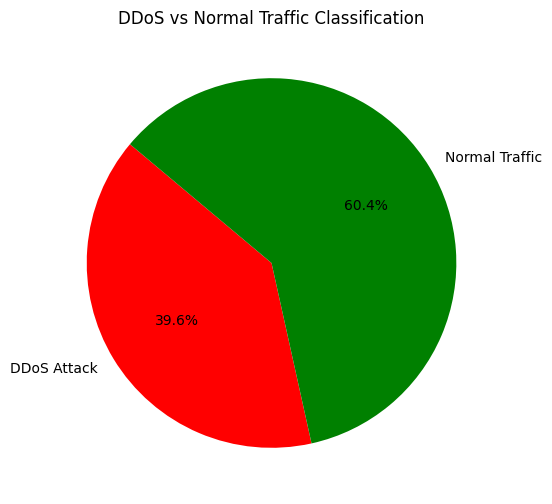

In [ ]:
    # Plot the distribution of DDoS vs Normal Traffic
    plt.figure(figsize=(6, 6))
    labels = ['DDoS Attack', 'Normal Traffic']
    values = [ddos_attacks, normal_traffic]
    colors = ['red', 'green']
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('DDoS vs Normal Traffic Classification')
    plt.show()


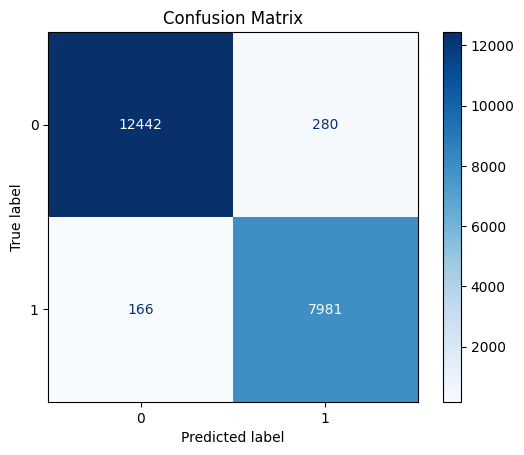

In [ ]:
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability scores for the positive class
y_prob = best_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

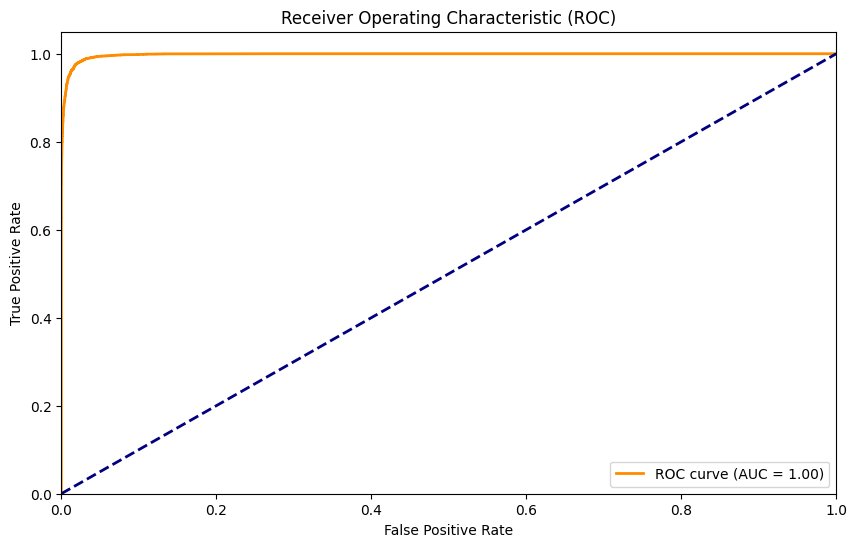

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

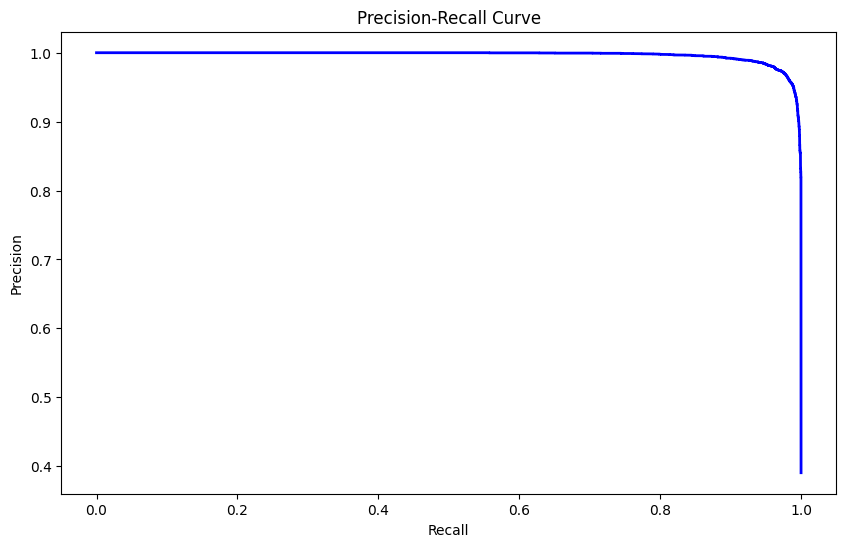

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------